In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [2]:
df = pd.read_csv("boston_housing.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop("MEDV", axis=1)
y= df['MEDV']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
loss,mae = model.evaluate(X_test,y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 587.1949 - mae: 22.2158
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 494.7887 - mae: 20.4528 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 479.5051 - mae: 19.7438 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 384.2719 - mae: 17.0814 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259.1083 - mae: 13.4927 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.2469 - mae: 9.2166  
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.3324 - mae: 6.5965  
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.7015 - mae: 5.3342 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.3677 - mae: 4.5899 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.5113 - mae: 4.1849 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.3690 - mae: 3.7965 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.1830 - mae: 3.5616 
E

In [10]:

history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7323 - mae: 2.0537 - val_loss: 10.9863 - val_mae: 2.2198
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9859 - mae: 2.0224 - val_loss: 11.2036 - val_mae: 2.2235
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6906 - mae: 2.0459 - val_loss: 11.1326 - val_mae: 2.2399
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9077 - mae: 2.0048 - val_loss: 11.2173 - val_mae: 2.2600
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2824 - mae: 2.0583 - val_loss: 10.9979 - val_mae: 2.2027
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3062 - mae: 2.0483 - val_loss: 11.2664 - val_mae: 2.2633
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8240 - mae: 2.0123 - val_loss: 11.1818 - val_mae: 2.2612
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2661 - mae: 1.9011 - val_loss: 10.7357 - val_mae: 2.1563
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [11]:
model.summary();


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,365 (60.02 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,244 (40.02 KB)

In [12]:
y_pred = model.predict(X_test).flatten()

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
     Actual  Predicted
173    23.6  27.535048
274    32.4  35.022774
491    13.6  16.871782
72     22.8  24.231676
452    16.1  16.036589
..      ...        ...
412    17.9   9.486250
436     9.6  10.634284
411    17.2  15.649307
86     22.5  24.806456
75     21.4  23.135633

[102 rows x 2 columns]


In [14]:
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [15]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 10.297011325731738
Root Mean Squared Error (RMSE): 3.208895655164209
R² Score: 0.8595870704880952
Mean Absolute Error (MAE): 2.1600859090393665


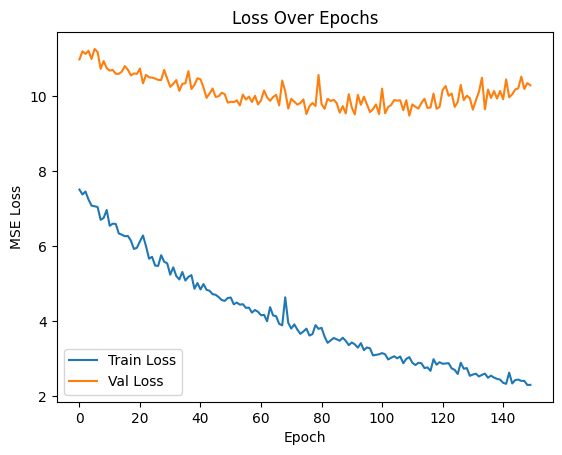

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

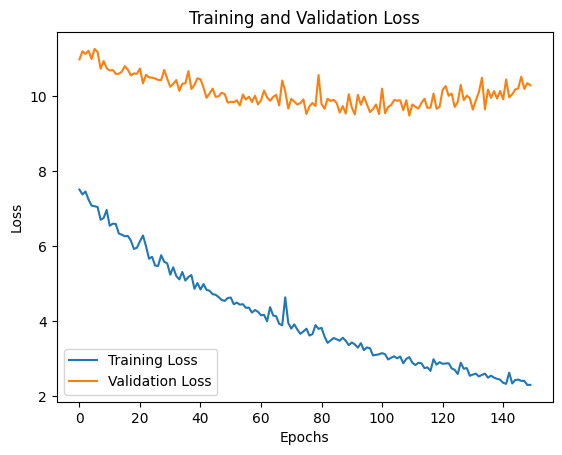

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)   # Very important!
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
print("\nPlease enter the following details to predict the house price:")

user_input = []
for feature in feature_names:
    value = float(input(f"Enter value for {feature}: "))
    user_input.append(value)

user_input = np.array(user_input).reshape(1,-1)

user_input_scaled = scaler.transform(user_input)

predicted_price = model.predict(user_input_scaled)
print(f"\n Predicted House Price: ${predicted_price[0][0]*1000:.2f}")
0


Please enter the following details to predict the house price:
Enter value for CRIM: 0.02
Enter value for ZN: 18
Enter value for INDUS: 2.31
Enter value for CHAS: 0
Enter value for NOX: 5.32
Enter value for RM: 6.5
Enter value for AGE: 65
Enter value for DIS: 4.0
Enter value for RAD: 1
Enter value for TAX: 296
Enter value for PTRATIO: 15.3
Enter value for B: 396
Enter value for LSTAT: 4.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

 Predicted House Price: $2340658.50


0